In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import humanize as hm
%matplotlib inline

In [104]:
gpdframe = pd.read_csv("datasets/gpd.csv")



In [105]:
gpd_years = []
gpd_values = gpdframe.values.astype(float)
gpd_values = np.array(gpd_values[0])
for i in gpdframe:
    gpd_years.append(i)
gpd_years = np.asarray(gpd_years)

In [106]:
print(gpd_years)

['1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969'
 '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016']


In [107]:
print(hm.intword(gpd_values[50]))

2.2 trillion


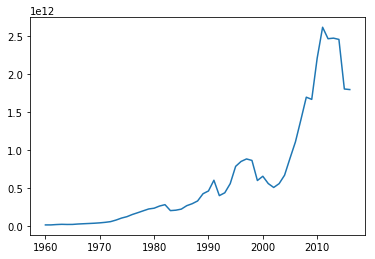

In [115]:
plt.plot(gpd_years,gpd_values)
xlegend = np.arange(min(gpd_years.astype(int)),max(gpd_years.astype(int)),10)
plt.xticks(xlegend,(xlegend))
#plt.ylim()
plt.show()